In [2]:

import numpy as np 
import matplotlib.pyplot as plt 
import requests
import pandas as pd



In [3]:



wine_cols = ["ID","Winery","Name", "Vintage","Country","Region",
             "Wine_Style", "Wine_Type", "Wine_Type_ID", 
             "Grape Type","Grape_ID",  
             'Rating', 'Review_Count','Price', 
             'Acidity', "Fizziness", "Intensity", "Sweetness", "Tannin"]

wine_df = pd.DataFrame(columns=wine_cols)
temp_df = pd.DataFrame(columns=wine_cols)

for y in range(2):       # y range is the number of grape types (up to 200)
    for x in range(2):  # x range is the number of pages (up to ?? - depends on grape)
        for z in range(1,5): # z range is the wine type (1: red, 2: white, 3: sparkling, 4: rosé)   
            r = requests.get(
            "https://www.vivino.com/api/explore/explore",
            params = {
                #"country_code": "en",
                'grape_ids[]':y+1,
                #"country_codes[]":["pt", "es", "fr", "de"],
                "currency_code":"EUR",
                #"grape_filter":"varietal",
                "min_rating":"1",
                #"order_by":"price", #  "ratings_average"
                #"order":"asc",
                "page": x+1,
                "price_range_max":"1500",
                "price_range_min":"0",
                "wine_type_ids[]":z, # red: 1;  white: 2; sparkling: 3; rosé: 4;
                "language":"en",
                "per_page":50
            },
                headers= {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",  
                'Accept': 'application/json',
                'Accept-Language': 'en-US,en;q=0.5',
            }

            )
            try:
                    
                results = [
                    (
                    f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',#ID
                    t["vintage"]["wine"]["winery"]["name"], #winery
                    t["vintage"]["wine"]["name"], #Name
                    t["vintage"]["year"], #Vintage
                    t["vintage"]["wine"]["region"]["country"]["name"], #Country
                    t["vintage"]["wine"]["region"]["name"], #region
                    t["vintage"]["wine"]["style"]["seo_name"], # wine style
                    t["vintage"]["wine"]["style"]["varietal_name"], # wine type
                    t["vintage"]["wine"]["type_id"], #wine type by id
                    r.json()["selected_filters"][0]["items"][0]["name"], # grape type
                    r.json()["selected_filters"][0]["items"][0]["id"], # grape id
                    t["vintage"]["statistics"]["ratings_average"], #rating
                    t["vintage"]["statistics"]["ratings_count"],# number of ratings
                    t["price"]["amount"],#price
                    t["vintage"]["wine"]["taste"]["structure"]["acidity"], # wine dimensions 1
                    t["vintage"]["wine"]["taste"]["structure"]["fizziness"],# wine dimensions 2
                    t["vintage"]["wine"]["taste"]["structure"]["intensity"], # wine dimensions 3
                    t["vintage"]["wine"]["taste"]["structure"]["sweetness"],# wine dimensions 4
                    t["vintage"]["wine"]["taste"]["structure"]["tannin"]    # wine dimensions 5

                    )
                    for t in r.json()["explore_vintage"]["matches"]
                    ]
                temp_df = pd.DataFrame(results,columns=wine_cols)
                wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
            except:
                    pass

/tmp/ipykernel_662/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
/tmp/ipykernel_662/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
/tmp/ipykernel_662/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when de

Country             
Australia      Price    0.551266
Chile          Price         NaN
France         Price    0.276911
Italy          Price    0.366491
Spain          Price   -0.004687
United States  Price    0.203665
Name: Rating, dtype: float64
Correlation between Price and Rating for Australia: 0.3316445142830399
Correlation between Price and Rating for United States: 0.49717218557053716
Correlation between Price and Rating for France: 0.4812291667175035
Correlation between Price and Rating for Italy: 0.6578104959126478
Correlation between Price and Rating for Spain: nan
Correlation between Price and Rating for Chile: nan


/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


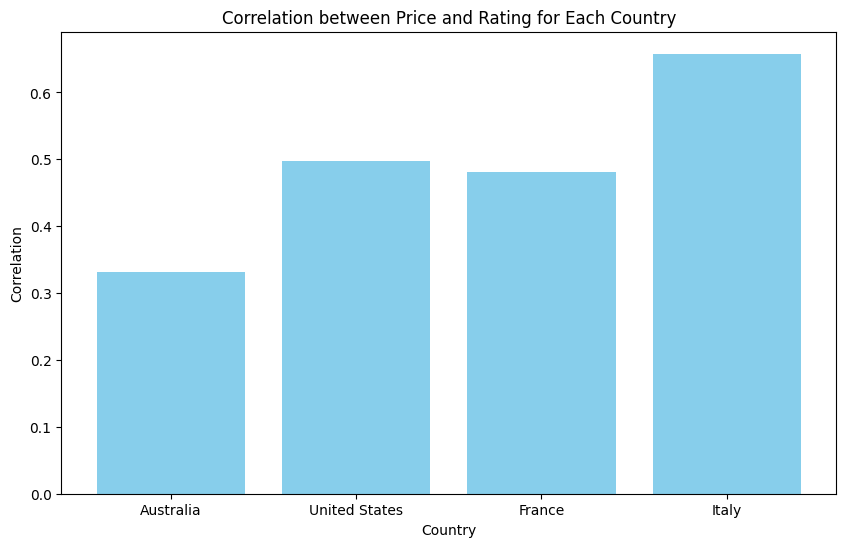

In [42]:
#Solution with '0' reviews included
correlations_by_country = wine_df.groupby('Country')[['Price', 'Rating']].corr().iloc[0::2, -1]
print(correlations_by_country)

#Solution without '0' reviews
# Create a dictionary to store correlation values for each country
correlation_dict = {}
distinct_countries = wine_df['Country'].unique()
# Calculate for each distinct country
for country in distinct_countries:
    # Select a specific country (e.g., 'France')
    selected_country = country
    country_data = wine_df[wine_df['Country'] == selected_country]
    
    asd=country_data.replace(0,np.NaN)
    

    # Check the correlation between 'Price' and 'Rating' for the selected country
    correlation = asd['Price'].corr(asd['Rating'])
    correlation_dict[country] = correlation

    # Display the correlation for the selected country
    print(f"Correlation between Price and Rating for {selected_country}: {correlation}")
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Country', 'Correlation'])
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Country'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Rating for Each Country')
plt.show()


              Price   Acidity  Intensity  Sweetness
Price      1.000000  0.043898   0.460181   0.303602
Acidity    0.043898  1.000000  -0.192447  -0.381157
Intensity  0.460181 -0.192447   1.000000   0.562872
Sweetness  0.303602 -0.381157   0.562872   1.000000


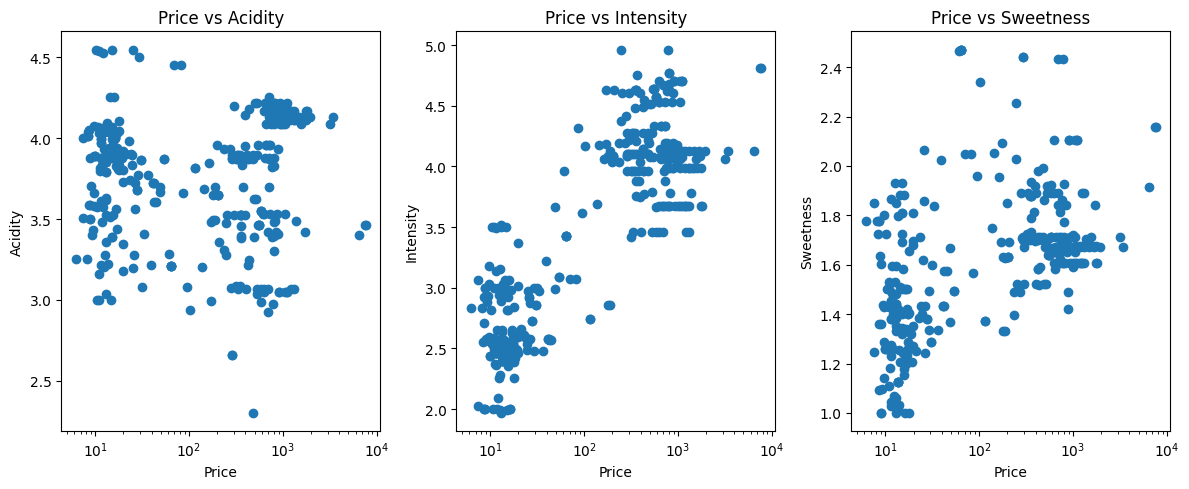

In [6]:

correlation_matrix = wine_df[['Price', 'Acidity', 'Intensity', 'Sweetness']].corr()
print(correlation_matrix)


# Selecting columns for the scatter plot matrix
selected_attributes = ['Acidity', 'Intensity', 'Sweetness']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(selected_attributes), figsize=(12, 5))

# Plotting scatter plots for each selected attribute against 'Price'
for i, attribute in enumerate(selected_attributes):
    axes[i].scatter(wine_df['Price'], wine_df[attribute], marker='o')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel(attribute)
    axes[i].set_xscale('log')
    axes[i].set_title(f'Price vs {attribute}')




# Adjust layout
plt.tight_layout()
plt.show()